# APA a.a. 22/23 - Test Primalità Monte Carlo

Lontani dal caso peggiore: Test Primalità Monte Carlo (Compito 8.1 delle note)<br>
![alt text](8.1.png "Test Primalità Monte Carlo")

## Librerie Necessarie

In [1]:
%pip install numpy
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Implementazione Algoritmo

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random
from random import randint
import math
from math import gcd 
import decimal

### Algoritmo Miller-Rabin

In [3]:
def MCPrimalityTest(n):
    
    if(n < 3 or (n % 2) == 0):
        return f"{n} is not prime"
    
    s = 0
    q = n - 1

    while q % 2 == 0:
        s += 1
        q //= 2

    k = 3 # Numero di iterazioni

    for _ in range(k):  # Effettuiamo tre iterazioni
        a = randint(2, n - 2) # Numero random da 2 a n-1
        x = pow(decimal.Decimal(a), decimal.Decimal(q), decimal.Decimal(n))  # Calcolo di x ≡ a^q (mod n)

        if x == 1 or x == n - 1: # Teorema di Fermat
            if(not is_prime(n)):
                continue
            return True # Probabilmente primo

        for _ in range(s - 1):
            x = pow(x, 2, n)  # Calcolo di x ≡ x^2 (mod n)

            if x == n - 1:
                if(not is_prime(n)):
                    continue
                return True # Probabilmente primo
        else:
            return False # Composto

    return True # Probabilmente primo

### Ricerca dell'Ordine di un Elemento

In [4]:
def find_order(n):
    order = 1 # Ordine di Z* di n

    for a in range(1, n):
        if gcd(a, n) == 1: # Se a e n sono coprimi
            result = pow(a, order, n) # Calcolo di a^order (mod n)
            while result != 1:
                result = (result * a) % n # Calcolo di a^order (mod n)
                order += 1

                if order >= n: # Se l'ordine è maggiore o uguale a n
                    return -1
    return order

### Ricerca dei Testimoni

In [5]:
def find_witnesses(n): # Trova i testimoni per n
    witnesses = [] # Lista dei testimoni
    result = False 
    for a in range(2, n - 1):
        result = MCPrimalityTest(n) # Applica il test di primalità di Miller-Rabin
        if result == False: # Se il numero è composto
            witnesses.append(a) # Aggiungi il numero alla lista dei testimoni
    return witnesses, result

### Brute Force per il controllo se un numero è primo

In [6]:
def is_prime(n):
    if n <= 1: # Se n è minore o uguale a 1
        return False

    for i in range(2, n): # Per ogni numero i compreso tra 2 e n
        if n % i == 0:
            return False # Se n è divisibile per i, allora n è composto

    return True # Se n non è divisibile per nessun numero i, allora n è primo

### Esecuzione Test

In [7]:
n1 = 999
n2 = 997
n3 = 973

# Calcolo dell'ordine di Z* di n1, n2 e n3
order_n1 = find_order(n1)
order_n2 = find_order(n2)
order_n3 = find_order(n3)

# Calcolo dei testimoni per n1, n2 e n3
witnesses_n1, prime_n1 = find_witnesses(n1)
witnesses_n2, prime_n2 = find_witnesses(n2)
witnesses_n3, prime_n3 = find_witnesses(n3)

# Calcolo delle frazioni di testimoni per n1, n2 e n3
fraction_n1 = len(witnesses_n1) / (n1 - 3)
fraction_n2 = len(witnesses_n2) / (n2 - 3)
fraction_n3 = len(witnesses_n3) / (n3 - 3)

### Stampa Risultati

In [8]:
print(f"Numero: {n1} è primo? {prime_n1}")
print(f"Realmente è primo? {is_prime(n1)}")
print(f"Ordine di Z* di {n1}: {order_n1}")
print(f"Testimoni: {witnesses_n1}")
print(f"Frazione di testimoni: {fraction_n1}")
print(f"Frazione di testimoni > 50%: {fraction_n1 > 0.5}\n")

print(f"Numero: {n2} è primo? {prime_n2}")
print(f"Realmente è primo? {is_prime(n2)}")
print(f"Ordine di Z* di {n2}: {order_n2}")
print(f"Testimoni: {witnesses_n2}")
print(f"Frazione di testimoni: {fraction_n2}")
print(f"Frazione di testimoni > 50%: {fraction_n2 > 0.5}\n")

print(f"Numero: {n3} è primo? {prime_n3}")
print(f"Realmente è primo? {is_prime(n3)}")
print(f"Ordine di Z* di {n3}: {order_n3}")
print(f"Testimoni: {witnesses_n3}")
print(f"Frazione di testimoni: {fraction_n3}")
print(f"Frazione di testimoni > 50%: {fraction_n3 > 0.5}\n")

Numero: 999 è primo? False
Realmente è primo? False
Ordine di Z* di 999: 36
Testimoni: [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205

### Esecuzione Test - 100000 run

In [9]:
numberRun = 10000

# Calcolo delle volte in cui la frazione di testimoni è maggiore di 50% per n1, n2 e n3
count_n1 = 0
count_n2 = 0
count_n3 = 0

# Calcolo delle frazioni di testimoni per n1, n2 e n3
for i in range(numberRun):
    # Calcolo dei testimoni per n1, n2 e n3
    witnesses_n1, prime_n1 = find_witnesses(n1)
    witnesses_n2, prime_n2 = find_witnesses(n2)
    witnesses_n3, prime_n3 = find_witnesses(n3)

    # Calcolo delle frazioni di testimoni per n1, n2 e n3
    fraction_n1 = len(witnesses_n1) / (n1 - 3)
    fraction_n2 = len(witnesses_n2) / (n2 - 3)
    fraction_n3 = len(witnesses_n3) / (n3 - 3)

    if prime_n1:
        count_n1 += 1

    if prime_n2:
        count_n2 += 1
    
    if prime_n3:
        count_n3 += 1

print(f"Numero: {n1} volte in cui è primo: {count_n1} con probabilità: {count_n1 / numberRun}")
print(f"Numero: {n2} volte in cui è primo: {count_n2} con probabilità: {count_n2 / numberRun}")
print(f"Numero: {n3} volte in cui è primo: {count_n3} con probabilità: {count_n3 / numberRun}")

Numero: 999 volte in cui è primo: 0 con probabilità: 0.0
Numero: 997 volte in cui è primo: 10000 con probabilità: 1.0
Numero: 973 volte in cui è primo: 0 con probabilità: 0.0


### Plotting dei Risultati 

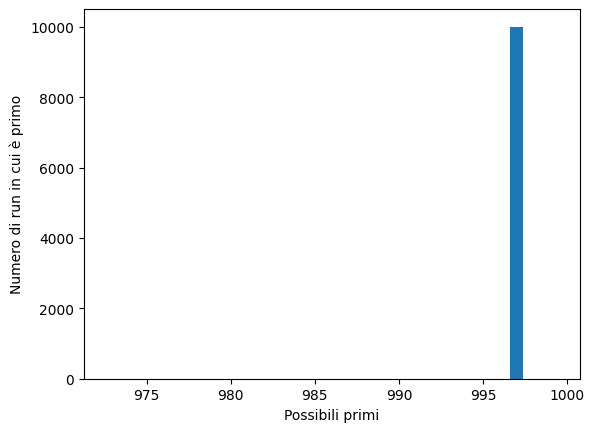

In [10]:

plt.bar([n1, n2, n3], [count_n1, count_n2, count_n3])
plt.xlabel('Possibili primi')
plt.ylabel('Numero di run in cui è primo')
plt.show()

## Conclusioni

Il numero 999 non è primo, ma il test di Miller-Rabin lo ha riconosciuto come tale in 100000 run su 100000.<br>
Il numero 997 invece è primo, e il test di Miller-Rabin lo ha riconosciuto come tale in 100000 run su 100000.<br>
Il numero 973 invece non è primo, e il test di Miller-Rabin lo ha riconosciuto come tale in 100000 run su 100000.<br>

Bisogna che però ci fermiamo ad fare un osservazione sul numero 973.<br>
Anche se per tutte le 100000 run il test di Miller-Rabin ha riconosciuto il numero 973 come non primo, quindi correttamente, potrebbe accedere che per un numero più elevato di run il test di Miller-Rabin dia un falso positivo. 
Ovvero 973 è detto numeri di Carmichael, ovvero un numero composto che soddisfa la consgurneza di Fermat per ogni a coprimo con 973 (nel nostro caso se solo se a non è divisibile per 7 e 139).<br>

Infine, possiamo constatare che la frazione dei testimoni è sempre maggiore del 50% e che quindi il test di Miller-Rabin è un test probabilistico che ci permette di riconoscere se un numero è primo o composto con una probabilità di errore pari a 1/4.<br>